In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython import nominal

In [4]:
df = pd.read_csv('job_data_prepared.csv')

In [7]:
df.head()

,title,company,ratings,reviews,experience,salary,location,days_posted,tags,loc_simp,...,r,nlp,sas,git,tensorflow,pytorch,tableau,power_bi,apache,c++
0,Machine Learning (AI) Architect,Persistent,4.1,1781 Reviews,5-12 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",3 Days Ago,time analysis machine intelligence employee e...,bangalore,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Cognizant,4.0,31471 Reviews,8-10 Yrs,Not disclosed,"Hybrid - Kolkata, Hyderabad/Secunderabad, Pune...",30+ Days Ago,python R machine learning statistical program...,bangalore,...,1,0,0,0,0,0,0,0,0,0
2,Senior Data Scientist-New Frontiers,IDFC FIRST Bharat,4.2,458 Reviews,3-7 Yrs,Not disclosed,"Kolkata, Mumbai, New Delhi, Hyderabad/Secunder...",16 Days Ago,data automation frontier sql machine analysis...,bangalore,...,0,0,0,0,0,0,0,0,0,0
3,Data Scientist (HR),NCR Corporation,4.1,1009 Reviews,1-2 Yrs,Not disclosed,"Mumbai, New Delhi, Hyderabad/Secunderabad",30+ Days Ago,python data science business intelligence int...,other,...,0,0,0,0,0,0,0,0,0,0
4,Data Science - Technical Lead,Paytm,3.7,4707 Reviews,6-8 Yrs,Not disclosed,"Noida, Bangalore/Bengaluru",30+ Days Ago,python data science science machine learning ...,bangalore,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,ratings,salary_mentioned,reviews_int,min_experience,max_experience,avg_experience,days_posted_int,python,sql,deep_learning,...,r,nlp,sas,git,tensorflow,pytorch,tableau,power_bi,apache,c++
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,...,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000
mean,3.929333,0.049524,1565.114286,3.971429,7.550476,5.760952,24.135238,0.489524,0.352381,0.121905,...,0.024762,0.076190,0.034286,0.026667,0.007619,0.015238,0.019048,0.017143,0.015238,0.030476
std,0.575134,0.217166,5187.675072,2.643793,3.309111,2.890082,9.042246,0.500367,0.478167,0.327488,...,0.155547,0.265556,0.182136,0.161261,0.087037,0.122615,0.136823,0.129927,0.122615,0.172057
min,1.300000,0.000000,2.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.700000,0.000000,10.000000,2.000000,5.000000,4.000000,19.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,63.000000,3.000000,7.000000,5.500000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.200000,0.000000,528.000000,5.000000,10.000000,7.500000,30.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,54038.000000,15.000000,20.000000,17.500000,30.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


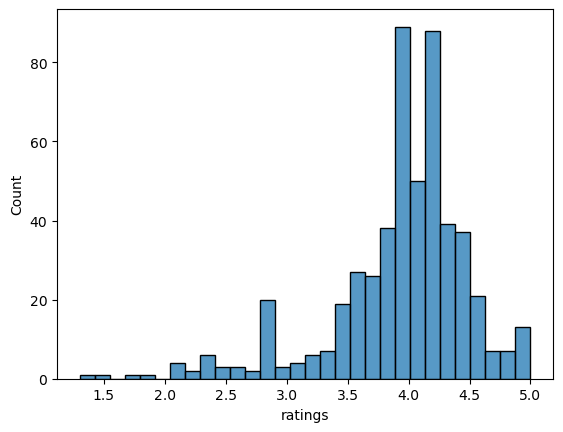

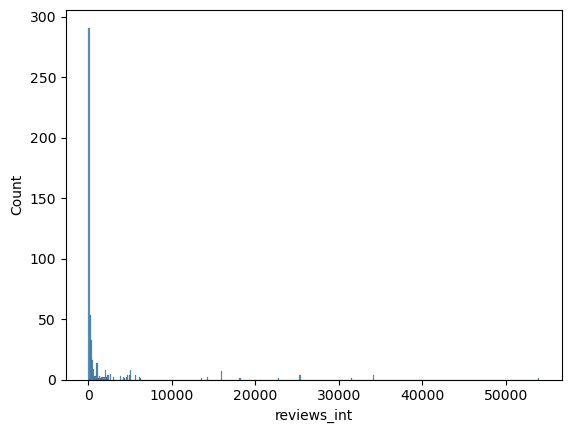

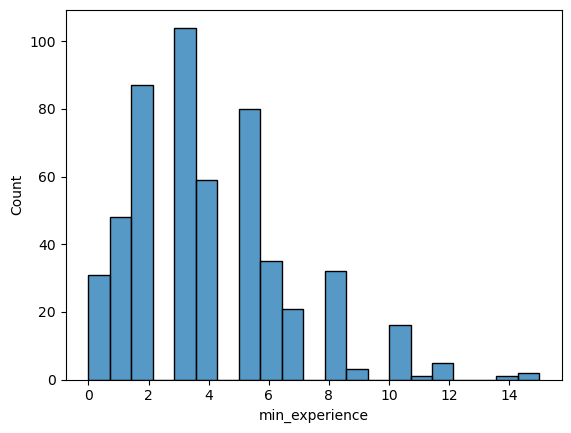

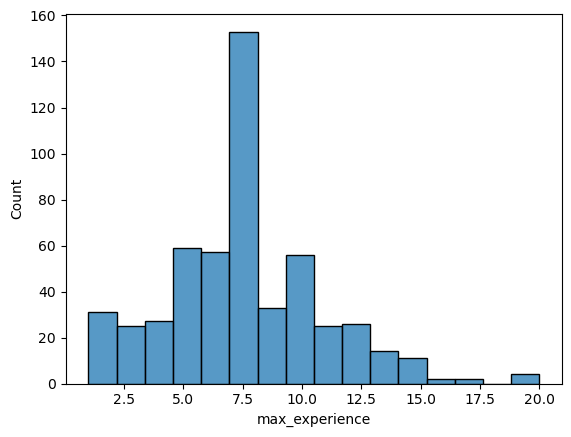

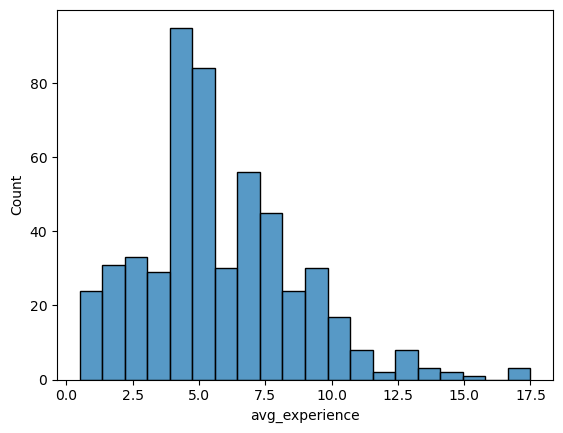

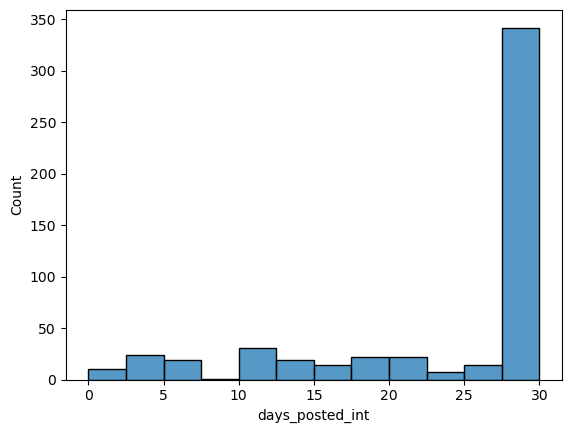

In [44]:
df.columns
cont_cols = df.select_dtypes(exclude=["object_"]).loc[:,:"days_posted_int"].drop('salary_mentioned',axis=1)

for i in cont_cols.columns:
    sns.histplot(cont_cols[i])
    plt.show()

In [48]:
yn_cols = df.select_dtypes(exclude=["object_"]).loc[:,'python':]

yn_cols

,python,sql,deep_learning,big_data,r,nlp,sas,git,tensorflow,pytorch,tableau,power_bi,apache,c++
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,1,0,0,0,0,0,0,0,0,0,0,0,0,0
521,0,0,0,0,0,0,0,0,0,0,0,0,0,0
522,0,1,0,0,0,0,0,1,0,0,0,0,0,0
523,0,0,0,0,0,0,0,0,0,0,0,0,0,0
